In [1]:
from qiskit.visualization import plot_histogram
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from matplotlib import ticker

In [15]:
#plt.rcParams['font.family'] = "DeJavu Serif"

In [13]:
#matplotlib.rcParams.keys()

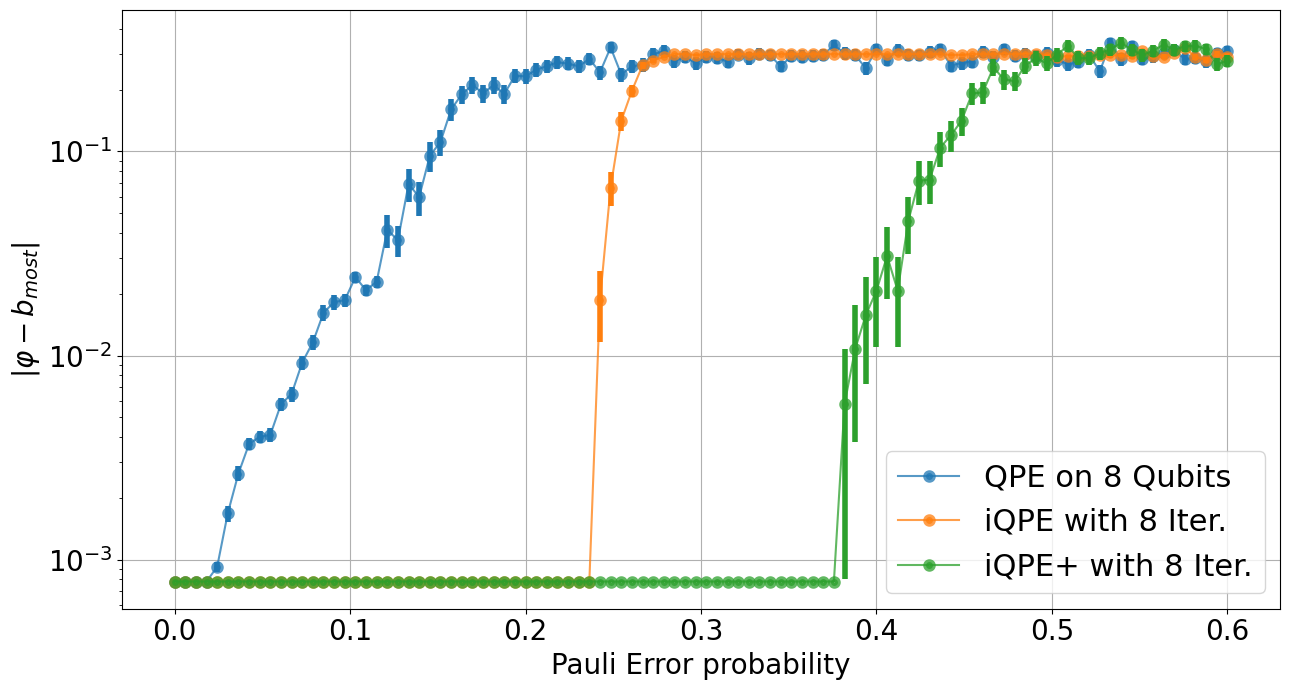

In [25]:
iQPE_plus = np.loadtxt("txt/result_iQPE+_err_thresh.txt")
iQPE = np.loadtxt("txt/result_iQPE_err_thresh.txt")
QPE = np.loadtxt("txt/result_QPE_err_thresh.txt")

angle = 0.3
n = 8
shots = 10000

fig, ax = plt.subplots(figsize=(13,7))

ax = plt.plot(QPE[0,:],QPE[1,:], marker = ".", label="QPE on 8 Qubits", markersize = 10, mew=4,alpha=0.75)
ax = plt.errorbar(QPE[0,:],QPE[1,:], yerr=QPE[2,:], linestyle="", linewidth=4, color = "C0")

ax = plt.plot(iQPE[0,:],iQPE[1,:], marker = ".", label="iQPE with 8 Iter.", markersize = 10, mew=4,alpha=0.75)
ax = plt.errorbar(iQPE[0,:],iQPE[1,:], yerr=iQPE[2,:], linestyle="", linewidth=4, color = "C1")

ax = plt.plot(iQPE_plus[0,:],iQPE_plus[1,:], marker = ".", label="iQPE+ with 8 Iter.", markersize = 10, mew=4,alpha=0.75)
ax = plt.errorbar(iQPE_plus[0,:],iQPE_plus[1,:], yerr=iQPE_plus[2,:], linestyle="", linewidth=4, color = "C2")

#plt.title(r"Precision over the dep. err. with "+r"$\varphi$"+" = {} and {} shots".format(angle, int(shots)), fontsize = 25)
plt.yscale("log")
plt.ylabel(r"$\vert \varphi - b_{most}\vert$",fontsize=20)
plt.xlabel("Pauli Error probability", fontsize=20)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)
#plt.rcParams.update({'font.size': 10})
plt.legend(fontsize=22, loc="lower right")
plt.grid()
plt.tight_layout()
plt.savefig("Figures/Error_Threshhold.png", dpi = 300)

In [21]:
print(iQPE_plus[2,:])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00497494 0.007      0.00852936
 0.00979796 0.01187434 0.00979796 0.01430909 0.01732096 0.01730659
 0.02054378 0.02116049 0.02245438 0.02398423 0.02440618 0.02448307
 0.02459624 0.02324626 0.02508785 0.02450222 0.0233575  0.02374863
 0.02287353 0.02263635 0.02154203 0.02213286 0.02174215 0.02293706
 0.02217117 0.02069791 0.02118471 0.02198152 0.02111968 0.02124755
 0.02098

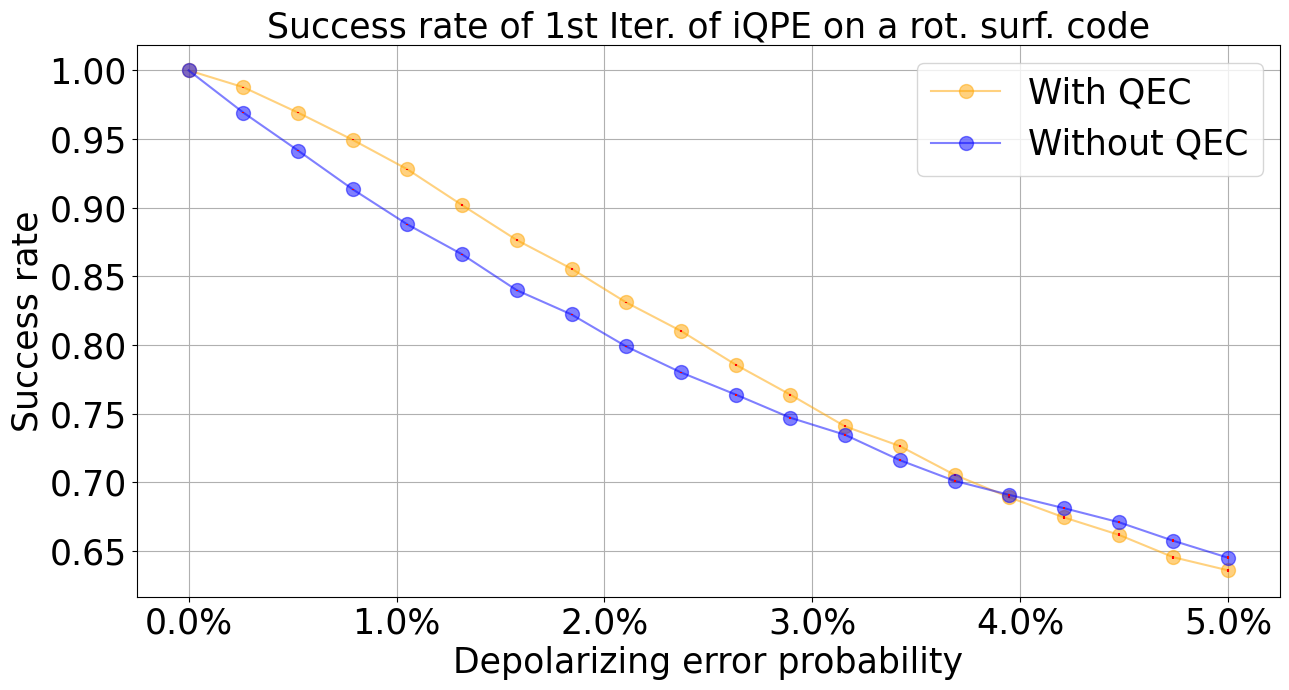

In [159]:
QEC = np.loadtxt("txt/QEC_50k_shots.txt", delimiter=",")

x = QEC[0,:]
y = QEC[1,:]
y_no_QEC = QEC[2,:]

shots = 50000

QEC_error = [np.sqrt((i-i**2)/shots) for i in x]

fig, ax = plt.subplots(figsize=(13,7))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

ax = plt.plot(x,y,label = "With QEC", color="orange", marker = ".",markersize = 20, alpha = 0.5)
ax = plt.errorbar(x, y, yerr=QEC_error, ecolor="red", linestyle="")
ax = plt.plot(x,y_no_QEC, label = "Without QEC", color="blue", marker = ".", markersize = 20, alpha = 0.5)
ax = plt.errorbar(x, y_no_QEC, yerr=QEC_error, ecolor="red", linestyle="")
plt.title("Success rate of 1st Iter. of iQPE on a rot. surf. code", fontsize=25)
plt.xlabel("Depolarizing error probability", fontsize=25)
plt.ylabel("Success rate", fontsize=25)
plt.xticks(fontsize=25) 
plt.yticks(fontsize=25)
plt.grid()
plt.legend(fontsize=25)
plt.tight_layout()
#plt.savefig("iQPE_1st.png", dpi = 300)

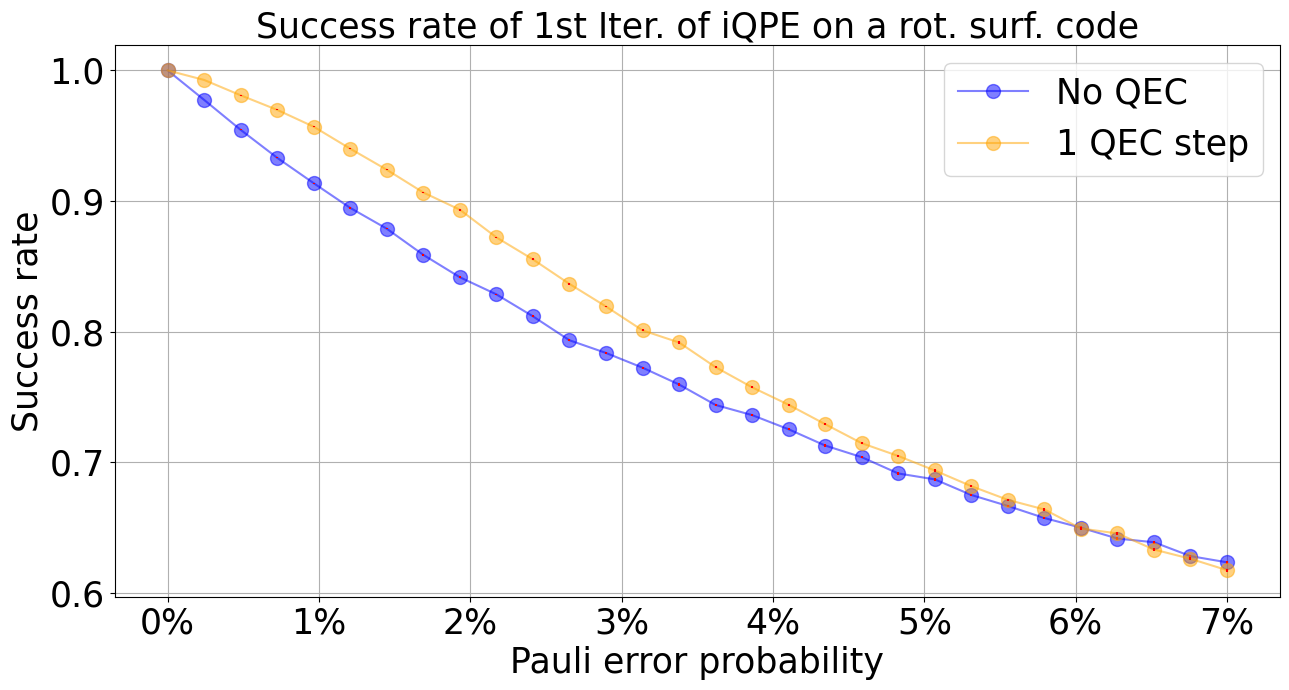

In [24]:
QEC = np.loadtxt("txt/QEC_50k_shots_Pauli_XZ.txt", delimiter=",")

x = QEC[0,:]
y = QEC[1,:]
y_no_QEC = QEC[2,:]

shots = 50000

QEC_error = [np.sqrt((i-i**2)/shots) for i in x]

fig, ax = plt.subplots(figsize=(13,7))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
#ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))

ax = plt.plot(x,y_no_QEC, label = "No QEC", color="blue", marker = ".", markersize = 20, alpha = 0.5)
ax = plt.errorbar(x, y_no_QEC, yerr=QEC_error, ecolor="red", linestyle="")
ax = plt.plot(x,y,label = "1 QEC step", color="orange", marker = ".",markersize = 20, alpha = 0.5)
ax = plt.errorbar(x, y, yerr=QEC_error, ecolor="red", linestyle="")
plt.title("Success rate of 1st Iter. of iQPE on a rot. surf. code", fontsize=25)
plt.xlabel("Pauli error probability", fontsize=25)
plt.ylabel("Success rate", fontsize=25)
plt.xticks(fontsize=25) 
plt.yticks(fontsize=25)
plt.yticks(np.arange(0.6, 1.05, step=0.1))
plt.grid()
plt.legend(fontsize=25)
plt.tight_layout()
plt.savefig("Figures/iQPE_1st_Pauli.png", dpi = 300)

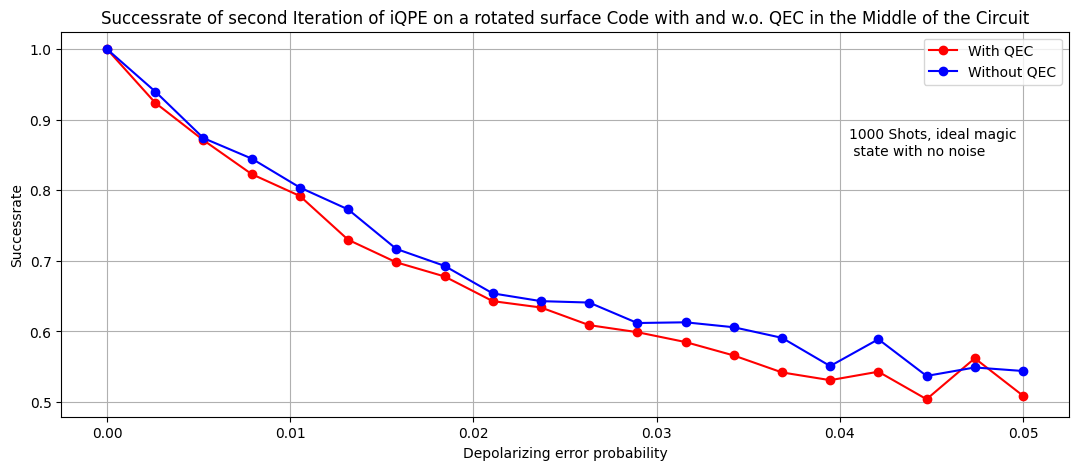

In [5]:
data = np.loadtxt("txt/iQPE_2nd_step_1000shots.txt", delimiter=",")

x = data[0,:]
y = data[1,:]
y_no_QEC = data[2,:]

fig, ax = plt.subplots(figsize=(13,5))

ax.plot(x,y,label = "With QEC", color="red", marker = "o")
ax.plot(x,y_no_QEC, label = "Without QEC", color="blue", marker = "o")
plt.title("Successrate of second Iteration of iQPE on a rotated surface Code with and w.o. QEC in the Middle of the Circuit")
plt.xlabel("Depolarizing error probability")
plt.text(0.0405,0.85,"1000 Shots, ideal magic \n state with no noise")
plt.ylabel("Successrate")
plt.grid()
plt.legend()
plt.show()

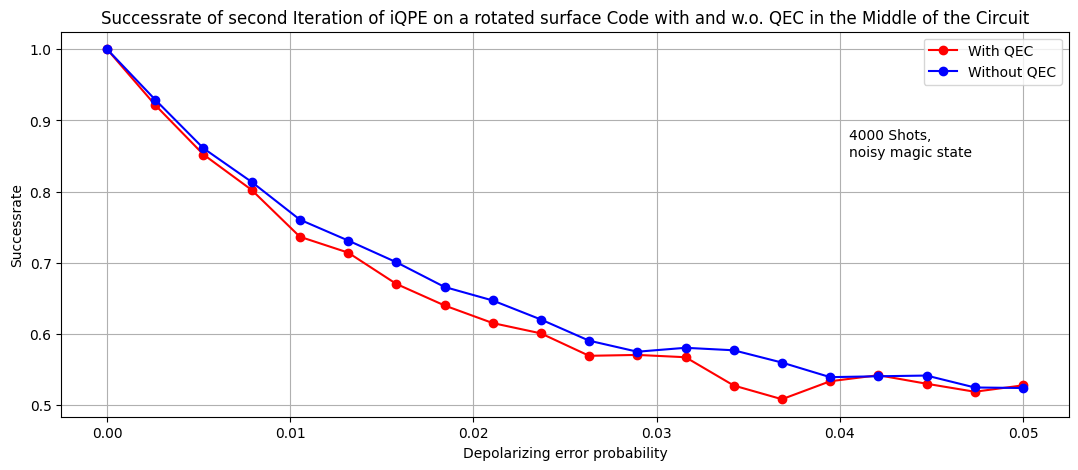

In [4]:
data = np.loadtxt("txt/iQPE_2nd_step_4000shots_noisy_magic_states.txt", delimiter=",")

x = data[0,:]
y = data[1,:]
y_no_QEC = data[2,:]

fig, ax = plt.subplots(figsize=(13,5))

ax.plot(x,y,label = "With QEC", color="red", marker = "o")
ax.plot(x,y_no_QEC, label = "Waithout QEC", color="blue", marker = "o")
plt.title("Successrate of second Iteration of iQPE on a rotated surface Code with and w.o. QEC in the Middle of the Circuit")
plt.xlabel("Depolarizing error probability")
plt.ylabel("Successrate")
plt.text(0.0405,0.85,"4000 Shots,\nnoisy magic state")
plt.grid()
plt.legend()
plt.show()

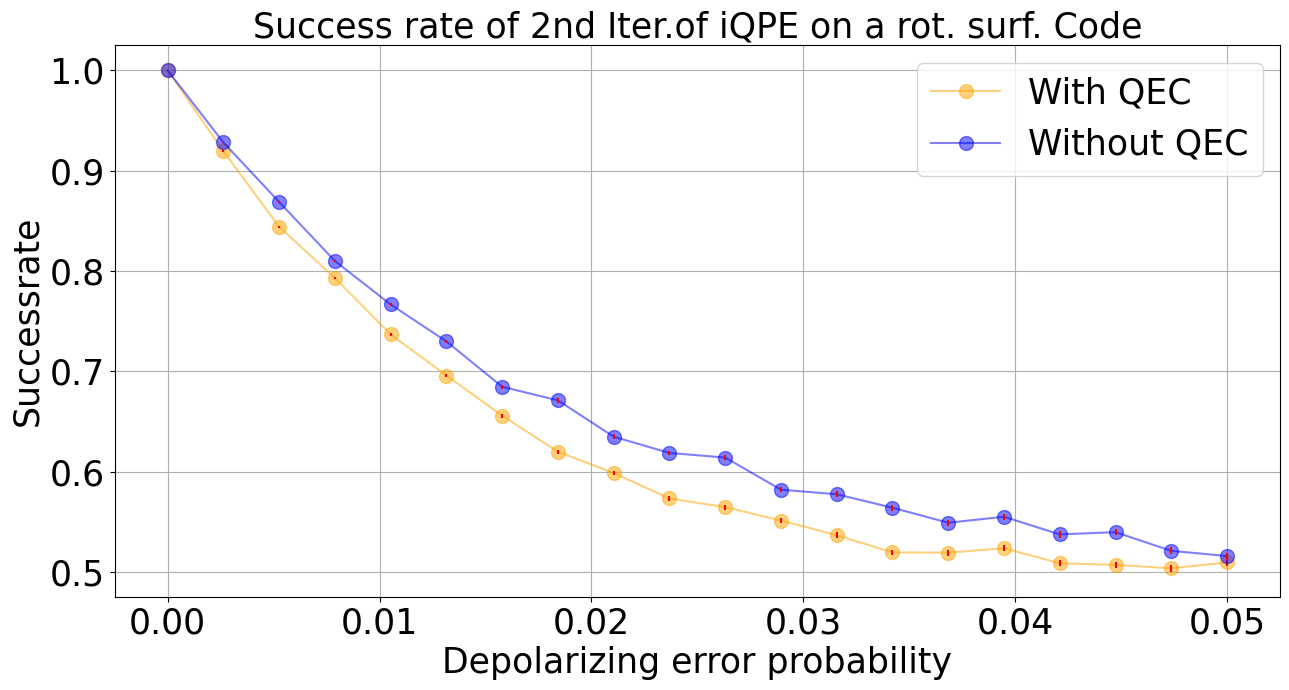

In [81]:
data = np.loadtxt("txt/iQPE_2nd_step_4000shots_noisy_magic_states_2QEC.txt", delimiter=",")

shots = 4000
x = data[0,:]
y = data[1,:]
y_no_QEC = data[2,:]
QEC_error = [np.sqrt((i-i**2)/shots) for i in x]

fig, ax = plt.subplots(figsize=(13,7))

ax = plt.plot(x,y,label = "With QEC", color="orange", marker = ".",markersize = 20, alpha = 0.5)
ax = plt.errorbar(x, y, yerr=QEC_error, ecolor="red", linestyle="")

ax = plt.plot(x,y_no_QEC, label = "Without QEC", color="blue", marker = ".", markersize = 20, alpha = 0.5)
ax = plt.errorbar(x, y_no_QEC, yerr=QEC_error, ecolor="red", linestyle="")

plt.title("Success rate of 2nd Iter.of iQPE on a rot. surf. Code", fontsize=25)
plt.xlabel("Depolarizing error probability", fontsize=25)
plt.ylabel("Successrate", fontsize=25)
#plt.text(0.0405,0.71,"4000 Shots,\nnoisy magic state \n 2 QEC (middle and end)")
plt.xticks(fontsize=25) 
plt.yticks(fontsize=25)
plt.grid()
plt.legend(fontsize=25, loc = "upper right")
plt.tight_layout()
plt.savefig("Figures/iQPE_2nd_bad.png", dpi = 300)
plt.show()

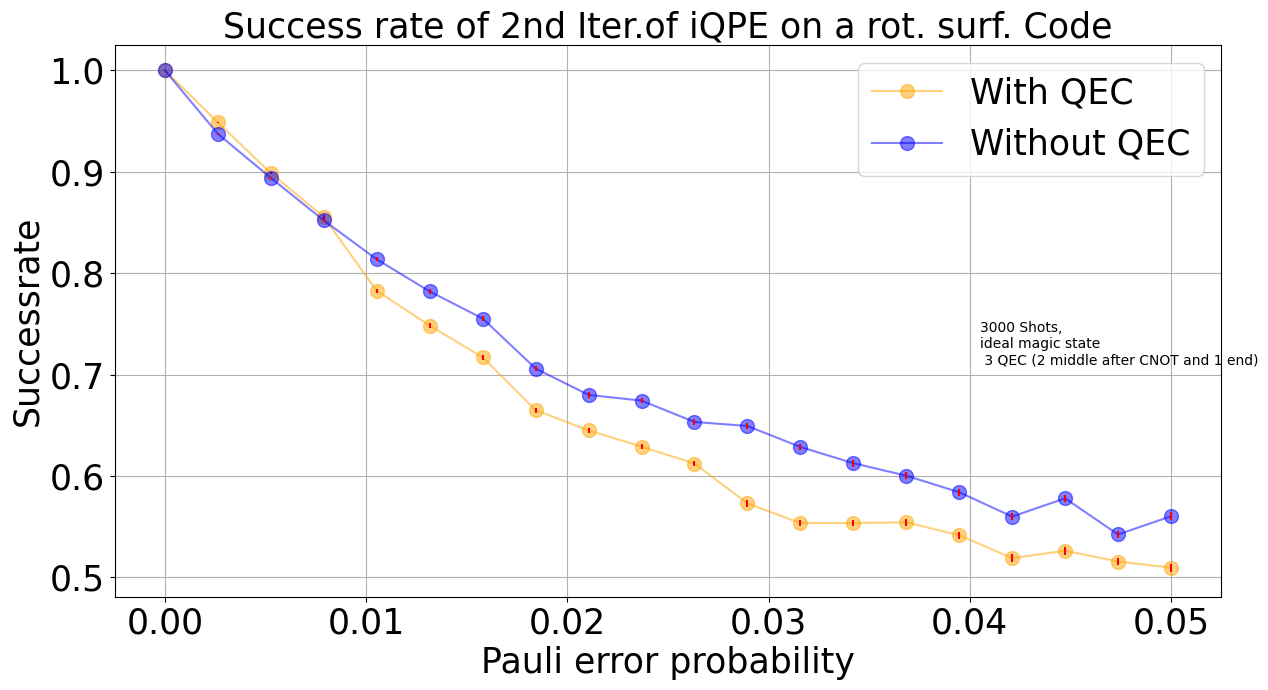

In [107]:
data = np.loadtxt("txt/iQPE_2nd_step_3000shots_ideal_magic_states_pauli_xz.txt", delimiter=",")

shots = 3000
x = data[0,:]
y = data[1,:]
y_no_QEC = data[2,:]
QEC_error = [np.sqrt((i-i**2)/shots) for i in x]

fig, ax = plt.subplots(figsize=(13,7))

ax = plt.plot(x,y,label = "With QEC", color="orange", marker = ".",markersize = 20, alpha = 0.5)
ax = plt.errorbar(x, y, yerr=QEC_error, ecolor="red", linestyle="")

ax = plt.plot(x,y_no_QEC, label = "Without QEC", color="blue", marker = ".", markersize = 20, alpha = 0.5)
ax = plt.errorbar(x, y_no_QEC, yerr=QEC_error, ecolor="red", linestyle="")

plt.title("Success rate of 2nd Iter.of iQPE on a rot. surf. Code", fontsize=25)
plt.xlabel("Pauli error probability", fontsize=25)
plt.ylabel("Successrate", fontsize=25)
plt.text(0.0405,0.71,"3000 Shots,\nideal magic state \n 3 QEC (2 middle after CNOT and 1 end)")
plt.xticks(fontsize=25) 
plt.yticks(fontsize=25)
plt.grid()
plt.legend(fontsize=25, loc = "upper right")
plt.tight_layout()
plt.savefig("Figures/iQPE_2nd_better.png", dpi = 300)

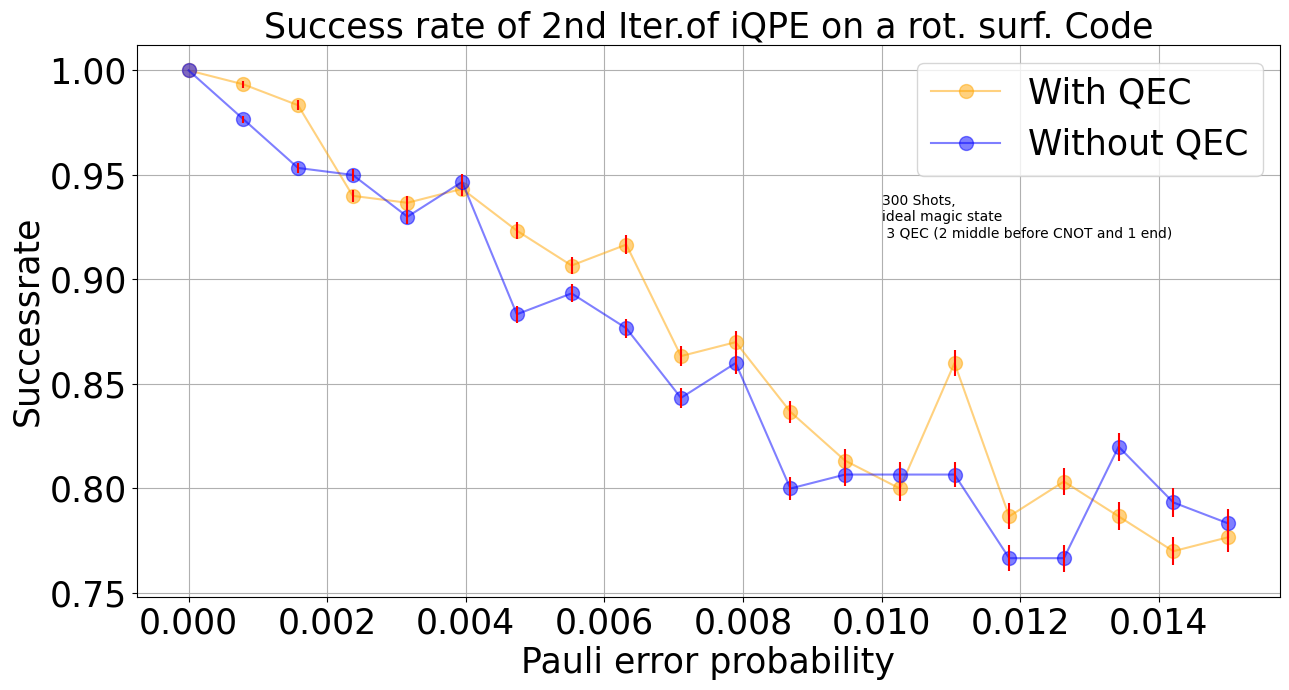

In [153]:
data = np.loadtxt("txt/iQPE_2nd_step_300shots_ideal_magic_states_pauli_xz_test.txt", delimiter=",")

shots = 300
x = data[0,:]
y = data[1,:]
y_no_QEC = data[2,:]
QEC_error = [np.sqrt((i-i**2)/shots) for i in x]

fig, ax = plt.subplots(figsize=(13,7))

ax = plt.plot(x,y,label = "With QEC", color="orange", marker = ".",markersize = 20, alpha = 0.5)
ax = plt.errorbar(x, y, yerr=QEC_error, ecolor="red", linestyle="")

ax = plt.plot(x,y_no_QEC, label = "Without QEC", color="blue", marker = ".", markersize = 20, alpha = 0.5)
ax = plt.errorbar(x, y_no_QEC, yerr=QEC_error, ecolor="red", linestyle="")

plt.title("Success rate of 2nd Iter.of iQPE on a rot. surf. Code", fontsize=25)
plt.xlabel("Pauli error probability", fontsize=25)
plt.ylabel("Successrate", fontsize=25)
plt.text(0.01,0.92,"300 Shots,\nideal magic state \n 3 QEC (2 middle before CNOT and 1 end)")
plt.xticks(fontsize=25) 
plt.yticks(fontsize=25)
plt.grid()
plt.legend(fontsize=25, loc = "upper right")
plt.tight_layout()
plt.savefig("Figures/iQPE_2nd_even_better.png", dpi = 300)

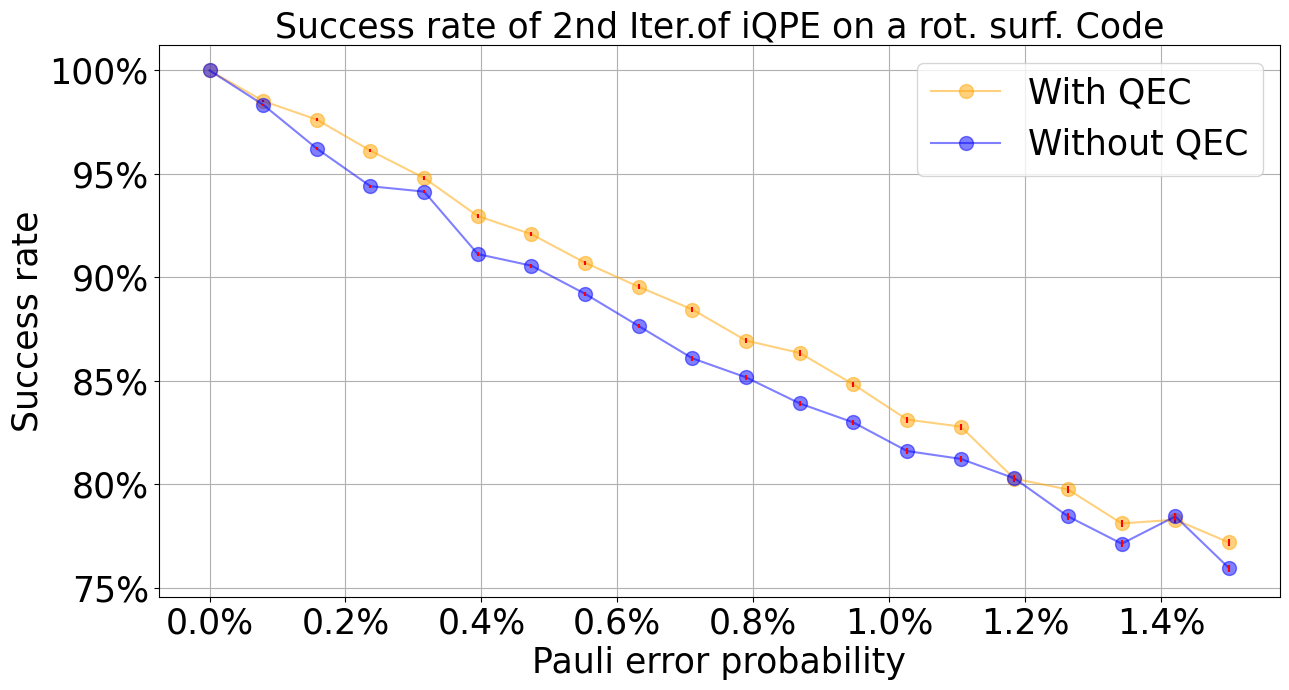

In [199]:
data = np.loadtxt("txt/iQPE_2nd_step_5000_shots_ideal_magic_states_pauli_xz_new.txt", delimiter=",")

shots = 5000
x = data[0,:]
y = data[1,:]
y_no_QEC = data[2,:]
QEC_error = [np.sqrt((i-i**2)/shots) for i in x]

fig, ax = plt.subplots(figsize=(13,7))

ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))

ax = plt.plot(x,y,label = "With QEC", color="orange", marker = ".",markersize = 20, alpha = 0.5)
ax = plt.errorbar(x, y, yerr=QEC_error, ecolor="red", linestyle="")

ax = plt.plot(x,y_no_QEC, label = "Without QEC", color="blue", marker = ".", markersize = 20, alpha = 0.5)
ax = plt.errorbar(x, y_no_QEC, yerr=QEC_error, ecolor="red", linestyle="")

plt.title("Success rate of 2nd Iter.of iQPE on a rot. surf. Code", fontsize=25)
plt.xlabel("Pauli error probability", fontsize=25)
plt.ylabel("Success rate", fontsize=25)
#plt.text(0.01,0.92,"300 Shots,\nideal magic state \n 3 QEC (2 middle before CNOT and 1 end)")
plt.xticks(fontsize=25) 
plt.yticks(fontsize=25)

plt.grid()
plt.legend(fontsize=25, loc = "upper right")
plt.tight_layout()
plt.savefig("Figures/iQPE_2nd_the_best.png", dpi = 300)

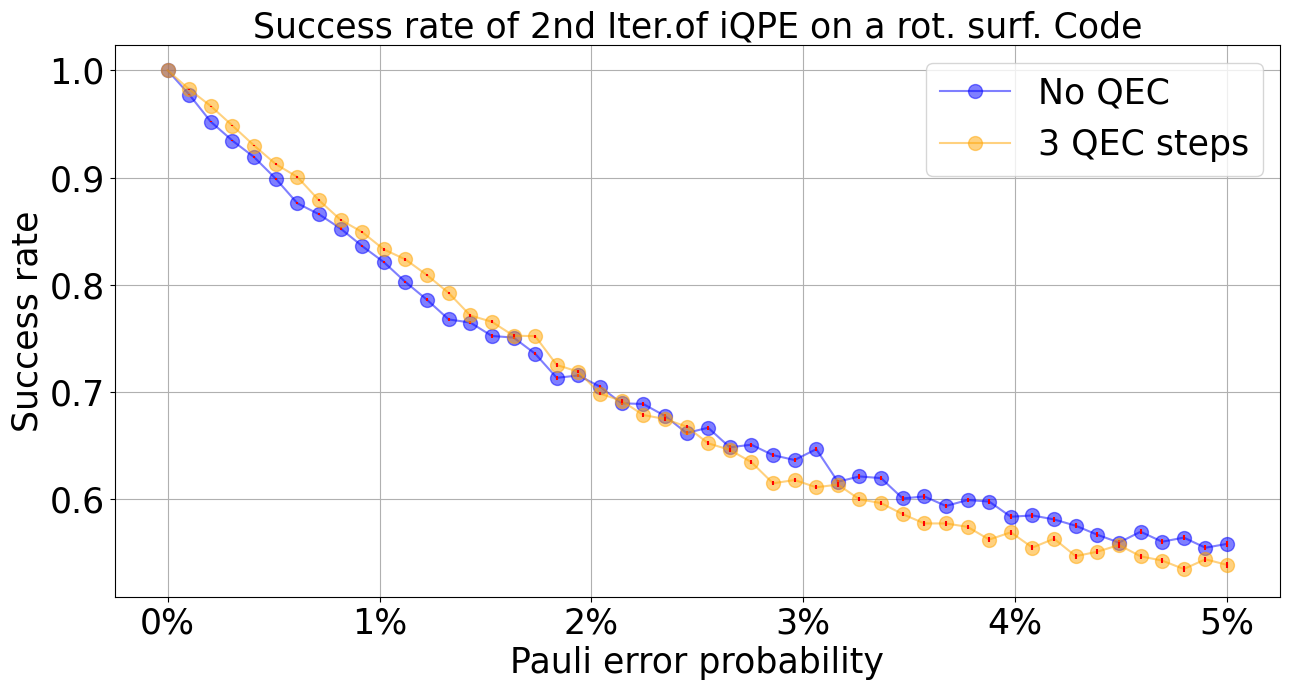

In [27]:
data = np.loadtxt("txt/iQPE_2nd_step_7500_shots_ideal_magic_states_pauli_xz_new.txt", delimiter=",")

shots = 7500
x = data[0,:]
y = data[1,:]
y_no_QEC = data[2,:]
QEC_error = [np.sqrt((i-i**2)/shots) for i in x]

fig, ax = plt.subplots(figsize=(13,7))

ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
#ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))

ax = plt.plot(x,y_no_QEC, label = "No QEC", color="blue", marker = ".", markersize = 20, alpha = 0.5)
ax = plt.errorbar(x, y_no_QEC, yerr=QEC_error, ecolor="red", linestyle="")

ax = plt.plot(x,y,label = "3 QEC steps", color="orange", marker = ".",markersize = 20, alpha = 0.5)
ax = plt.errorbar(x, y, yerr=QEC_error, ecolor="red", linestyle="")

plt.title("Success rate of 2nd Iter.of iQPE on a rot. surf. Code", fontsize=25)
plt.xlabel("Pauli error probability", fontsize=25)
plt.ylabel("Success rate", fontsize=25)
#plt.text(0.01,0.92,"300 Shots,\nideal magic state \n 3 QEC (2 middle before CNOT and 1 end)")
plt.xticks(fontsize=25) 
plt.yticks(fontsize=25)

plt.grid()
plt.legend(fontsize=25, loc = "upper right")
plt.tight_layout()
plt.savefig("Figures/iQPE_2nd_Pauli.png", dpi = 300)

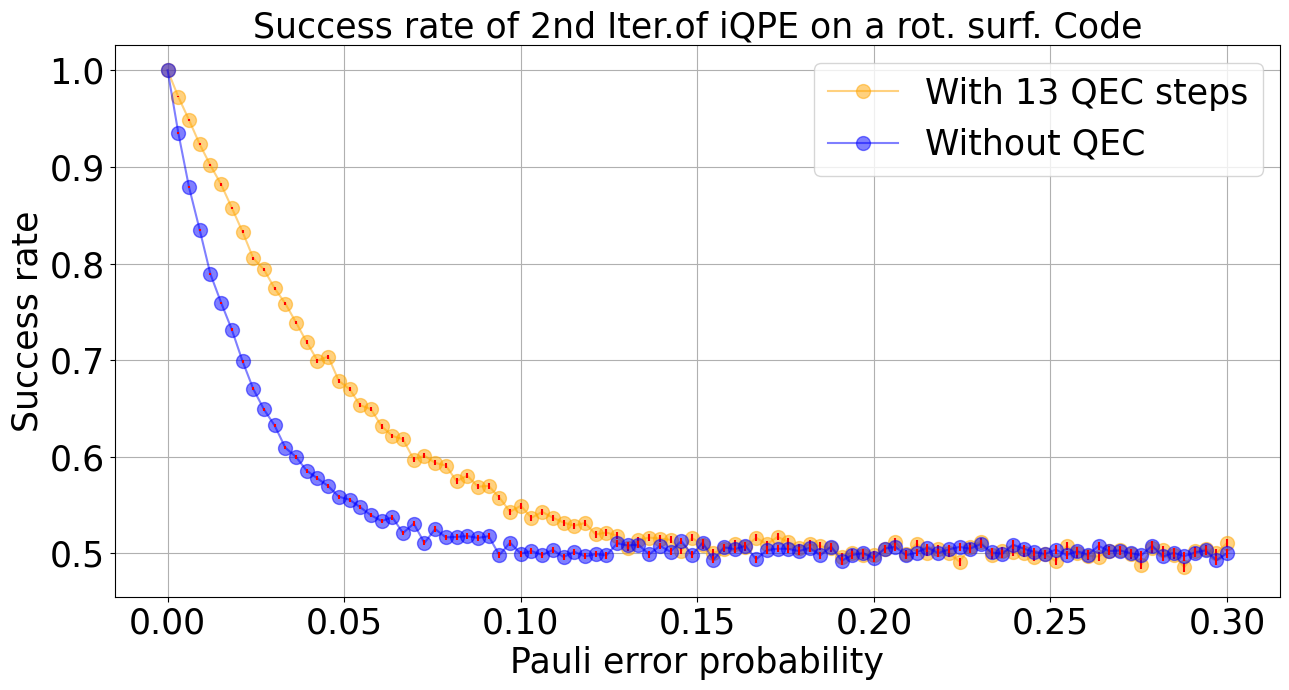

In [3]:
data = np.loadtxt("txt/result_total.txt")

shots = 10000
x = [i/2 for i in data[0,:]]
y = [i/2 for i in data[1,:]]
y_no_QEC = [i/2 for i in data[2,:]]
QEC_error = [np.sqrt((i-i**2)/shots) for i in x]

fig, ax = plt.subplots(figsize=(13,7))

#ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
#ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))

ax = plt.plot(x,y,label = "With 13 QEC steps", color="orange", marker = ".",markersize = 20, alpha = 0.5)
ax = plt.errorbar(x, y, yerr=QEC_error, ecolor="red", linestyle="")

ax = plt.plot(x,y_no_QEC, label = "Without QEC", color="blue", marker = ".", markersize = 20, alpha = 0.5)
ax = plt.errorbar(x, y_no_QEC, yerr=QEC_error, ecolor="red", linestyle="")

plt.title("Success rate of 2nd Iter.of iQPE on a rot. surf. Code", fontsize=25)
plt.xlabel("Pauli error probability", fontsize=25)
plt.ylabel("Success rate", fontsize=25)
#plt.text(0.01,0.92,"300 Shots,\nideal magic state \n 3 QEC (2 middle before CNOT and 1 end)")
plt.xticks(fontsize=25) 
plt.yticks(fontsize=25)

plt.grid()
plt.legend(fontsize=25, loc = "upper right")
plt.tight_layout()
plt.savefig("Figures/iQPE_2nd_leon.png", dpi = 300)

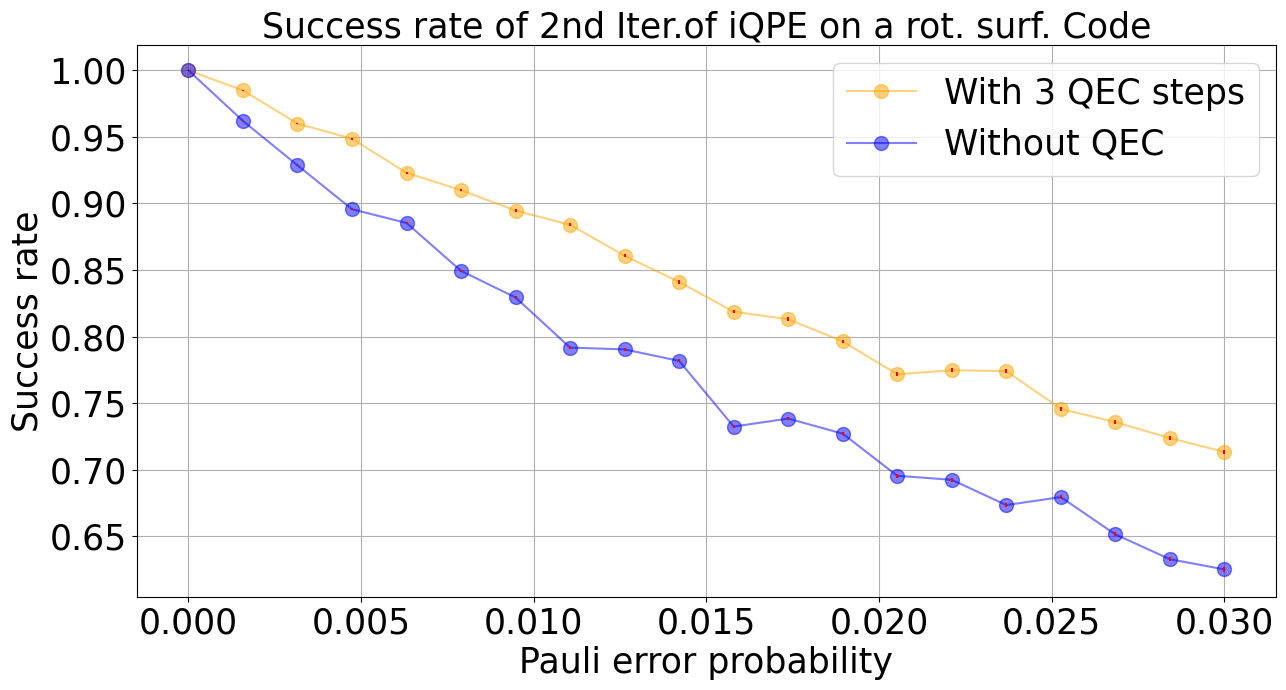

In [5]:
data = np.loadtxt("txt/iQPE_2nd_step_3000_shots_all_ideal_pauli_xz.txt", delimiter = ",")

shots = 10000
x = data[0,:]
y = data[1,:]
y_no_QEC = data[2,:]
QEC_error = [np.sqrt((i-i**2)/shots) for i in x]

fig, ax = plt.subplots(figsize=(13,7))

#ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
#ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))

ax = plt.plot(x,y,label = "With 3 QEC steps", color="orange", marker = ".",markersize = 20, alpha = 0.5)
ax = plt.errorbar(x, y, yerr=QEC_error, ecolor="red", linestyle="")

ax = plt.plot(x,y_no_QEC, label = "Without QEC", color="blue", marker = ".", markersize = 20, alpha = 0.5)
ax = plt.errorbar(x, y_no_QEC, yerr=QEC_error, ecolor="red", linestyle="")

plt.title("Success rate of 2nd Iter.of iQPE on a rot. surf. Code", fontsize=25)
plt.xlabel("Pauli error probability", fontsize=25)
plt.ylabel("Success rate", fontsize=25)
#plt.text(0.01,0.92,"300 Shots,\nideal magic state \n 3 QEC (2 middle before CNOT and 1 end)")
plt.xticks(fontsize=25) 
plt.yticks(fontsize=25)

plt.grid()
plt.legend(fontsize=25, loc = "upper right")
plt.tight_layout()
plt.savefig("Figures/iQPE_2nd_dustin.png", dpi = 300)

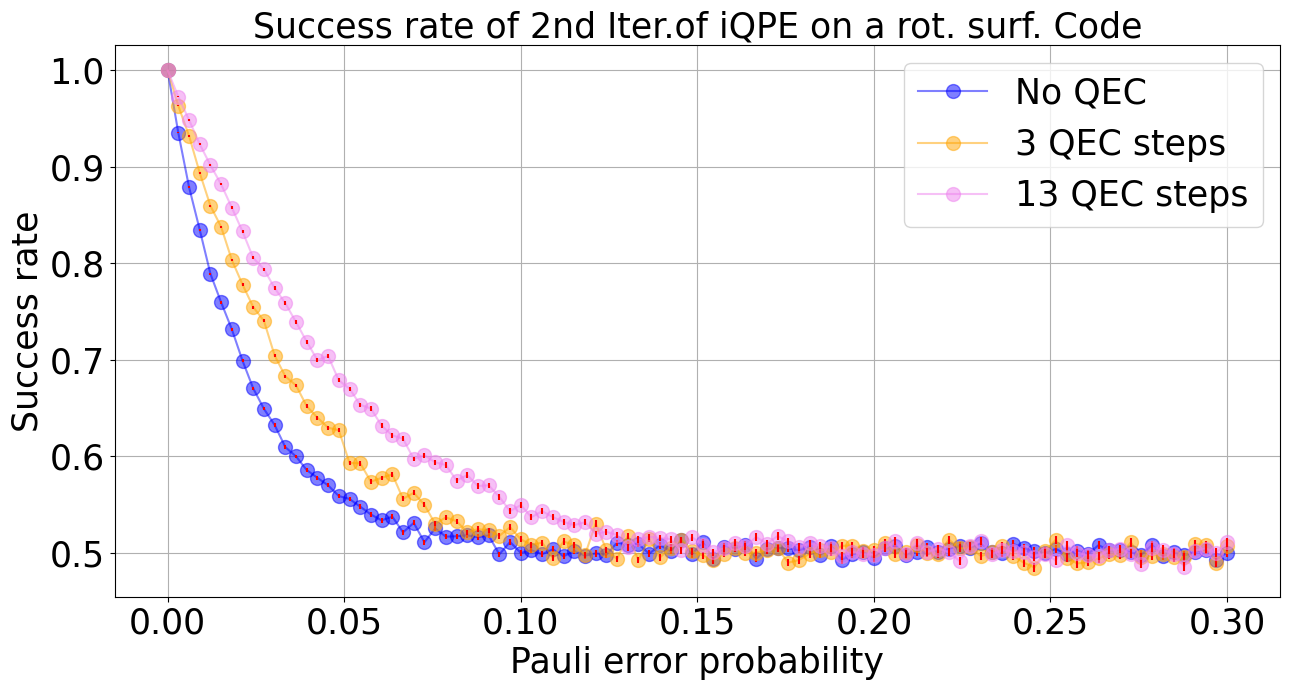

In [31]:
data = np.loadtxt("txt/result_total.txt")

shots = 10000
x = [i/2 for i in data[0,:]]
y = [i/2 for i in data[1,:]]
y_no_QEC = [i/2 for i in data[2,:]]
QEC_error = [np.sqrt((i-i**2)/shots) for i in x]

data1 = np.loadtxt("txt/result_total_2ndstep_3QEC.txt")

x1 = data1[0,:]
y1 = data1[1,:]
QEC_error1 = [np.sqrt((i-i**2)/shots) for i in x1]


fig, ax = plt.subplots(figsize=(13,7))

#ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
#ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))

ax = plt.plot(x,y_no_QEC, label = "No QEC", color="blue", marker = ".", markersize = 20, alpha = 0.5)
ax = plt.errorbar(x, y_no_QEC, yerr=QEC_error, ecolor="red", linestyle="")

ax = plt.plot(x1,y1, label = "3 QEC steps", color="orange", marker = ".", markersize = 20, alpha = 0.5)
ax = plt.errorbar(x1, y1, yerr=QEC_error1, ecolor="red", linestyle="")

ax = plt.plot(x,y,label = "13 QEC steps", color="violet", marker = ".",markersize = 20, alpha = 0.5)
ax = plt.errorbar(x, y, yerr=QEC_error, ecolor="red", linestyle="")

plt.title("Success rate of 2nd Iter.of iQPE on a rot. surf. Code", fontsize=25)
plt.xlabel("Pauli error probability", fontsize=25)
plt.ylabel("Success rate", fontsize=25)
#plt.text(0.01,0.92,"300 Shots,\nideal magic state \n 3 QEC (2 middle before CNOT and 1 end)")
plt.xticks(fontsize=25) 
plt.yticks(fontsize=25)

plt.grid()
plt.legend(fontsize=25, loc = "upper right")
plt.tight_layout()
plt.savefig("Figures/iQPE_2nd_compare.png", dpi = 300)

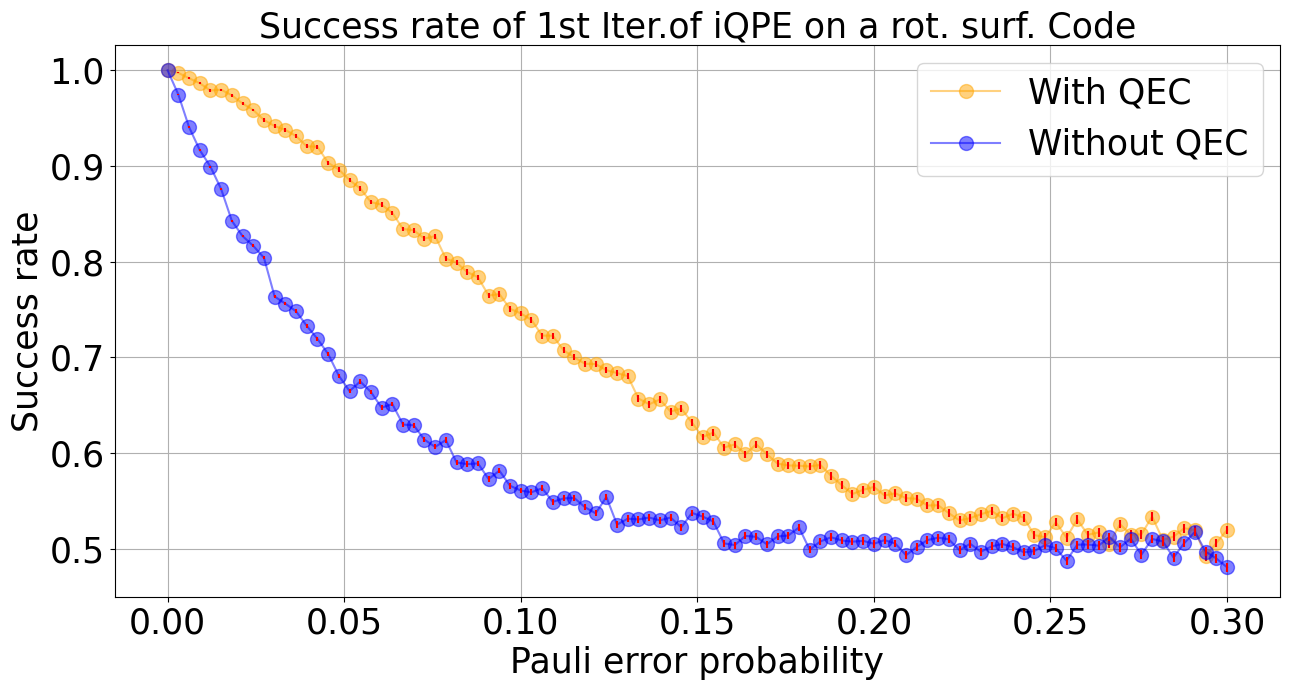

In [24]:
data = np.loadtxt("txt/result_total_1st.txt")

shots = 10000
x = data[0,:]
y = data[1,:]
y_no_QEC = data[2,:]
QEC_error = [np.sqrt((i-i**2)/shots) for i in x]

fig, ax = plt.subplots(figsize=(13,7))

#ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
#ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))

ax = plt.plot(x,y,label = "With QEC", color="orange", marker = ".",markersize = 20, alpha = 0.5)
ax = plt.errorbar(x, y, yerr=QEC_error, ecolor="red", linestyle="")

ax = plt.plot(x,y_no_QEC, label = "Without QEC", color="blue", marker = ".", markersize = 20, alpha = 0.5)
ax = plt.errorbar(x, y_no_QEC, yerr=QEC_error, ecolor="red", linestyle="")

plt.title("Success rate of 1st Iter.of iQPE on a rot. surf. Code", fontsize=25)
plt.xlabel("Pauli error probability", fontsize=25)
plt.ylabel("Success rate", fontsize=25)
#plt.text(0.01,0.92,"300 Shots,\nideal magic state \n 3 QEC (2 middle before CNOT and 1 end)")
plt.xticks(fontsize=25) 
plt.yticks(fontsize=25)

plt.grid()
plt.legend(fontsize=25, loc = "upper right")
plt.tight_layout()
plt.savefig("Figures/iQPE_1st_leon.png", dpi = 300)

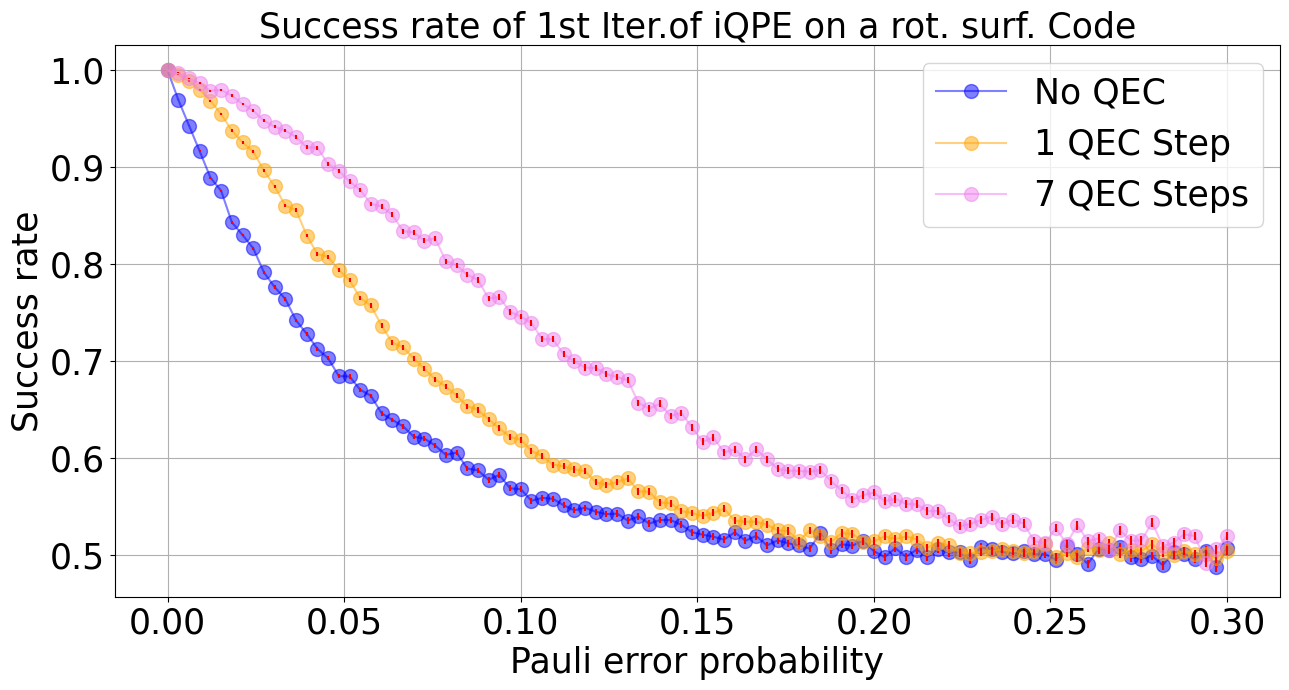

In [30]:
data = np.loadtxt("txt/iQPE_1st_step_10k_shots_Pauli_XZ_all_ideal_dustin.txt", delimiter = ",")

data_leon = np.loadtxt("txt/result_total_1st.txt")
shots = 10000
x = data[0,:]
y = data[1,:]
y_no_QEC = data[2,:]
QEC_error = [np.sqrt((i-i**2)/shots) for i in x]

x_L = data_leon[0,:]
y_L = data_leon[1,:]

fig, ax = plt.subplots(figsize=(13,7))

#ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
#ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))

ax = plt.plot(x,y_no_QEC, label = "No QEC", color="blue", marker = ".", markersize = 20, alpha = 0.5)
ax = plt.errorbar(x, y_no_QEC, yerr=QEC_error, ecolor="red", linestyle="")

ax = plt.plot(x,y,label = "1 QEC Step", color="orange", marker = ".",markersize = 20, alpha = 0.5)
ax = plt.errorbar(x, y, yerr=QEC_error, ecolor="red", linestyle="")

ax = plt.plot(x_L,y_L,label = "7 QEC Steps", color="violet", marker = ".",markersize = 20, alpha = 0.5)
ax = plt.errorbar(x_L, y_L, yerr=QEC_error, ecolor="red", linestyle="")

plt.title("Success rate of 1st Iter.of iQPE on a rot. surf. Code", fontsize=25)
plt.xlabel("Pauli error probability", fontsize=25)
plt.ylabel("Success rate", fontsize=25)
#plt.text(0.01,0.92,"300 Shots,\nideal magic state \n 3 QEC (2 middle before CNOT and 1 end)")
plt.xticks(fontsize=25) 
plt.yticks(fontsize=25)

plt.grid()
plt.legend(fontsize=25, loc = "upper right")
plt.tight_layout()
plt.savefig("Figures/iQPE_1st_compare.png", dpi = 300)

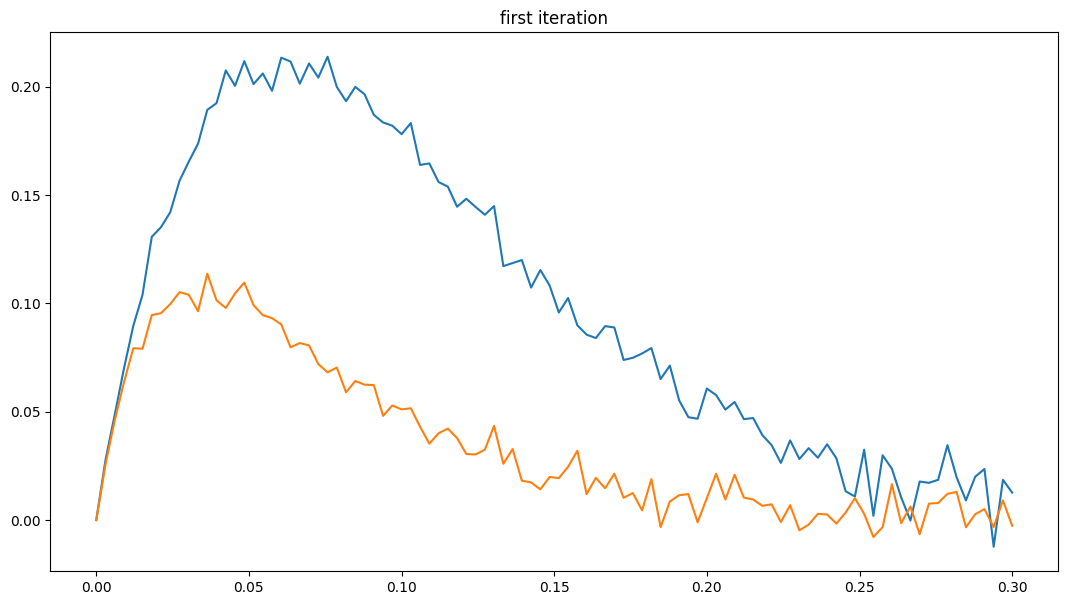

In [16]:
data = np.loadtxt("txt/iQPE_1st_step_10k_shots_Pauli_XZ_all_ideal_dustin.txt", delimiter = ",")

data_leon = np.loadtxt("txt/result_total_1st.txt")
shots = 10000
x = data[0,:]
y = data[1,:]
y_no_QEC = data[2,:]
QEC_error = [np.sqrt((i-i**2)/shots) for i in x]

x_L = data_leon[0,:]
y_L = data_leon[1,:]

fig, ax = plt.subplots(figsize=(13,7))

ax = plt.plot(x_L, y_L-y_no_QEC)
ax = plt.plot(x, y - y_no_QEC)

plt.title("first iteration")
plt.show()

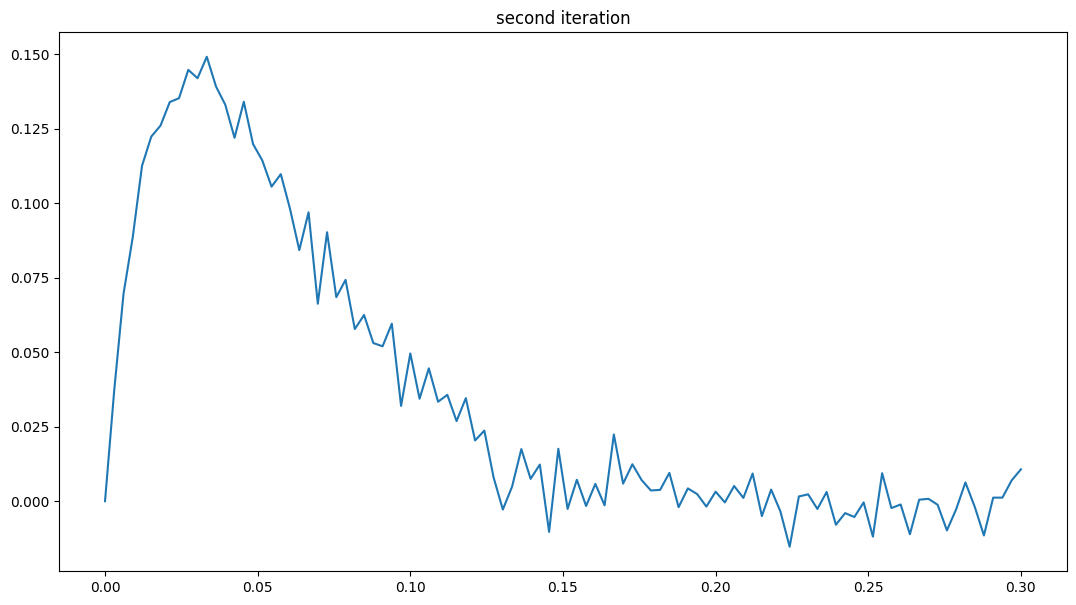

In [43]:
#data = np.loadtxt("txt/iQPE_2nd_step_3000_shots_all_ideal_pauli_xz.txt", delimiter = ",")

data = np.loadtxt("txt/result_total.txt")
shots = 10000
x = [i/2 for i in data[0,:]]
y = [i/2 for i in data[1,:]]
y_no_QEC = [i/2 for i in data[2,:]]

hää = []
for i in range(len(y)):
    hää.append(y[i]-y_no_QEC[i])

fig, ax = plt.subplots(figsize=(13,7))

ax = plt.plot(x, hää)

plt.title("second iteration")
plt.show()

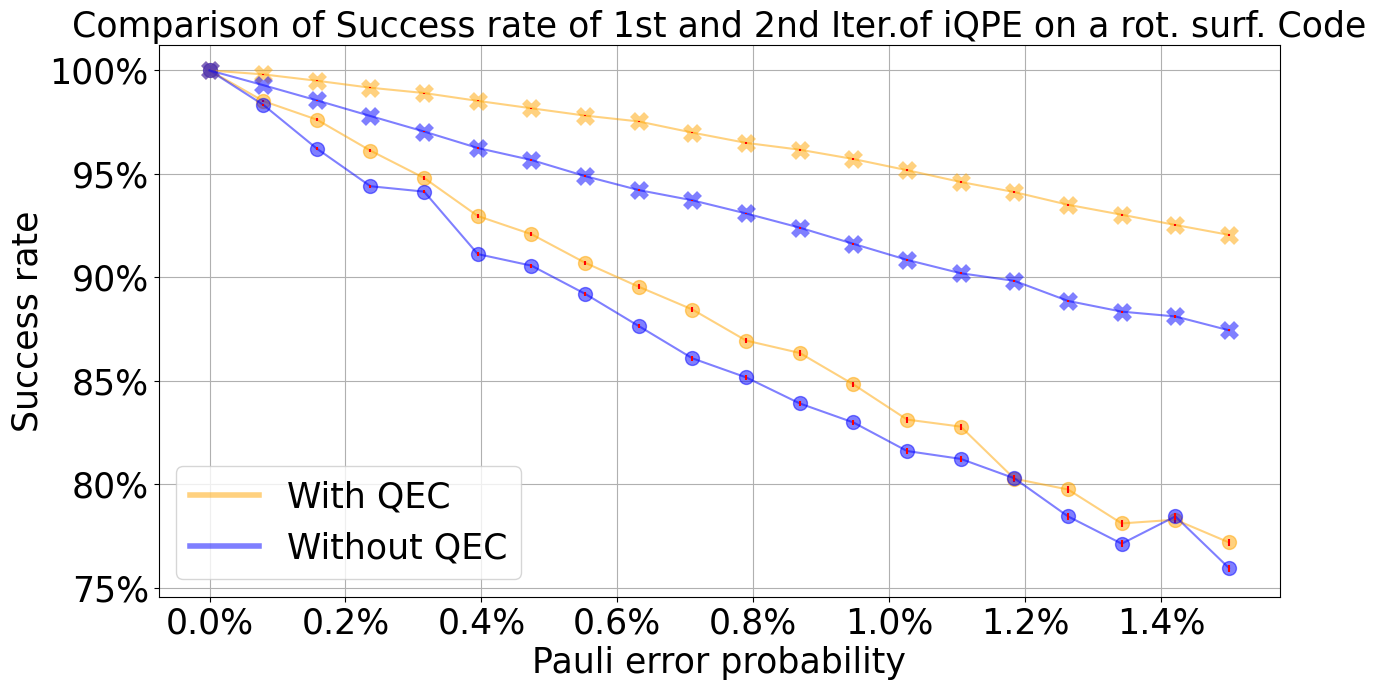

In [198]:
data = np.loadtxt("txt/iQPE_2nd_step_5000_shots_ideal_magic_states_pauli_xz_new.txt", delimiter=",")

QEC = np.loadtxt("txt/QEC_50k_shots_Pauli_XZ_compare.txt", delimiter=",")

x_1 = QEC[0,:]
y_1 = QEC[1,:]
y_no_QEC_1 = QEC[2,:]

shots_1 = 50000

QEC_error_1 = [np.sqrt((i-i**2)/shots_1) for i in x_1]

shots = 5000
x = data[0,:]
y = data[1,:]
y_no_QEC = data[2,:]
QEC_error = [np.sqrt((i-i**2)/shots) for i in x]

fig, ax = plt.subplots(figsize=(13,7))

ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))

ax = plt.plot(x,y, color="orange", marker = ".",markersize = 20, alpha = 0.5)
ax = plt.errorbar(x, y, yerr=QEC_error, ecolor="red", linestyle="")

ax = plt.plot(x,y_no_QEC, color="blue", marker = ".", markersize = 20, alpha = 0.5)
ax = plt.errorbar(x, y_no_QEC, yerr=QEC_error, ecolor="red", linestyle="")

ax = plt.plot(x_1,y_1, color="orange", marker = "x",markersize = 10, markeredgewidth = 5,alpha = 0.5)
ax = plt.errorbar(x_1, y_1, yerr=QEC_error_1, ecolor="red", linestyle="")

ax = plt.plot(x_1,y_no_QEC_1, color="blue", marker = "x", markersize = 10, markeredgewidth = 5, alpha = 0.5)
ax = plt.errorbar(x_1, y_no_QEC_1, yerr=QEC_error_1, ecolor="red", linestyle="")

ax = plt.plot([],[], linestyle="-", linewidth = "4",color="orange", label="With QEC", alpha = 0.5)
ax = plt.plot([],[], linestyle="-", linewidth = "4",color="blue", label="Without QEC", alpha = 0.5)

plt.title("Comparison of Success rate of 1st and 2nd Iter.of iQPE on a rot. surf. Code", fontsize=25)
plt.xlabel("Pauli error probability", fontsize=25)
plt.ylabel("Success rate", fontsize=25)
#plt.text(0.01,0.92,"300 Shots,\nideal magic state \n 3 QEC (2 middle before CNOT and 1 end)")
plt.xticks(fontsize=25) 
plt.yticks(fontsize=25)

plt.grid()
plt.legend(fontsize=25, loc = "lower left")
plt.tight_layout()
plt.savefig("Figures/iQPE_compare.png", dpi = 300)

In [3]:
def mean(x: list, y: list):                 #bildet den Mittelwert unter den Shots einer Messung
    m = 0
    total = 0
    for i in range(len(x)):
        m += x[i]*y[i]
        total += y[i]
    m = m*(1/total)
    return m

most:  0.30078125
Präzision (avg):  0.0008929687500000005
Präzision (most):  0.0007812500000000111


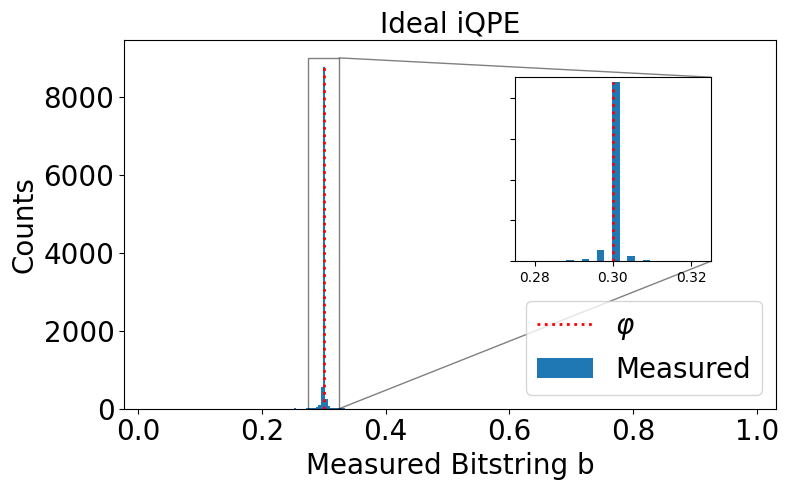

In [13]:
data = np.loadtxt("txt/pauli_iQPE_0.txt", delimiter=",")

x = data[0,:]
y = data[1,:]

avg = mean(x,y)
most = 0

for i in range(len(y)):
    if y[i] == max(y):
        most = x[i]

print("most: ", most)

print("Präzision (avg): ", avg-0.3)

print("Präzision (most): ", most-0.3)

fig, ax = plt.subplots(figsize=(8,5))

ax.bar(x, y, width = 2**(-8), label="Measured")
ax.vlines(0.3 , 0 , max(y), color = "red", linestyle = "dotted",  linewidth=2, label = r"$\varphi$")

x1, x2, y1, y2 = 0.275, 0.325, 0, 9000
axins = ax.inset_axes(
    [0.6, 0.4, 0.3, 0.5],
    xlim=(x1, x2), ylim=(y1, y2), yticklabels=[])
axins.bar(x,y,width = 2**(-8-1))
axins.vlines(0.3 , 0 , max(y), color = "red", linestyle = "dotted",  linewidth=2, label = r"$\varphi$")
ax.indicate_inset_zoom(axins, edgecolor="black")

#plt.title("iQPE: Iteration Cycles: 8, " + r"$\varphi\,$: 0.3, Shots: 10.000", fontsize=20)
plt.title("Ideal iQPE", fontsize=20)
plt.ylabel("Counts", fontsize=20)
plt.xlabel("Measured Bitstring b", fontsize=20)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)
#plt.xlim(0.25,0.35)

plt.legend(fontsize=20)
plt.tight_layout()

plt.savefig("Figures/Nice.png", dpi = 300)

most:  0.30078125
Präzision (avg):  0.04273867187500002
Präzision (most):  0.0007812500000000111


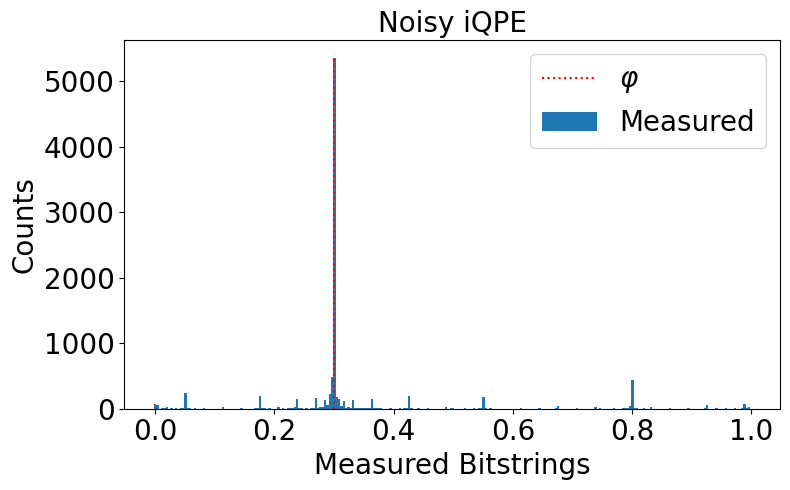

In [41]:
data = np.loadtxt("txt/pauli_iQPE_0_02.txt", delimiter=",")

x = data[0,:]
y = data[1,:]

avg = mean(x,y)
most = 0

for i in range(len(y)):
    if y[i] == max(y):
        most = x[i]

print("most: ", most)

print("Präzision (avg): ", avg-0.3)

print("Präzision (most): ", most-0.3)

fig, ax = plt.subplots(figsize=(8,5))

ax = plt.bar(x, y, width = 2**(-8), label="Measured")
plt.vlines(0.3 , 0 , max(y), color = "red", linestyle = "dotted", label = r"$\varphi$")

#plt.title("iQPE: Iteration Cycles: 8, " + r"$\varphi\,$: 0.3, Shots: 10.000", fontsize=20)
plt.title("Noisy iQPE", fontsize=20)
plt.ylabel("Counts", fontsize=20)
plt.xlabel("Measured Bitstrings", fontsize=20)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)

plt.legend(fontsize=20)
plt.tight_layout()

plt.savefig("Figures/iQPE_0_02.png", dpi = 300)

most:  0.30078125
Präzision (avg):  0.13260937500000003
Präzision (most):  0.0007812500000000111


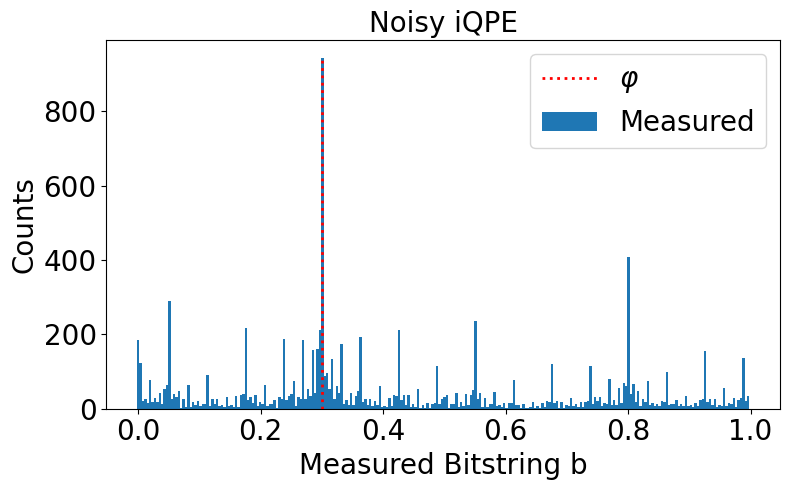

In [39]:
data = np.loadtxt("txt/pauli_iQPE_0_1.txt", delimiter=",")

x = data[0,:]
y = data[1,:]

avg = mean(x,y)
most = 0

for i in range(len(y)):
    if y[i] == max(y):
        most = x[i]

print("most: ", most)

print("Präzision (avg): ", avg-0.3)

print("Präzision (most): ", most-0.3)

fig, ax = plt.subplots(figsize=(8,5))

ax = plt.bar(x, y, width = 2**(-8), label="Measured")
#plt.vlines(avg, 0 , max(y), color='orange', linestyle='dashed', linewidth=2, label = "Mean")
plt.vlines(0.3 , 0 , max(y), color = "red", linestyle = "dotted", linewidth=2, label = r"$\varphi$")

#plt.title("iQPE: Iteration Cycles: 8, " + r"$\varphi\,$: 0.3, Shots: 10.000", fontsize=20)
plt.title("Noisy iQPE", fontsize=20)
plt.ylabel("Counts", fontsize=20)
plt.xlabel("Measured Bitstring b", fontsize=20)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)

plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig("Figures/iQPE_0_1.png", dpi = 300)

most:  0.80078125
Präzision (avg):  0.18219414062500006
Präzision (most):  0.50078125


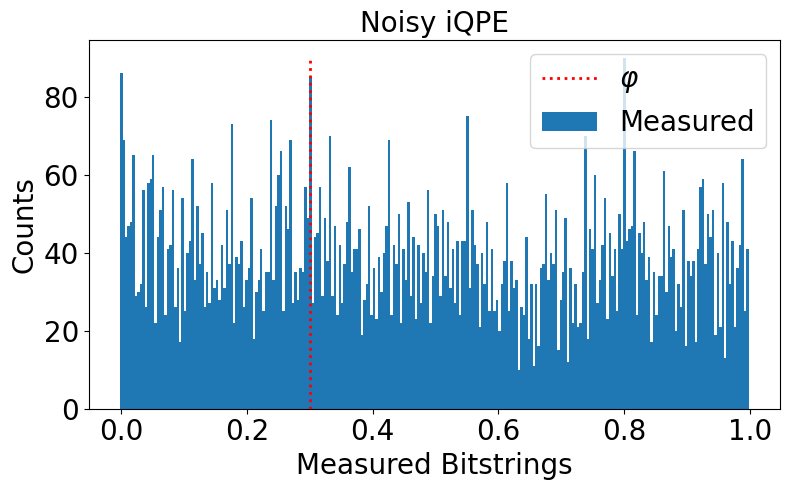

In [40]:
data = np.loadtxt("txt/pauli_iQPE_0_3.txt", delimiter=",")

x = data[0,:]
y = data[1,:]

avg = mean(x,y)
most = 0

for i in range(len(y)):
    if y[i] == max(y):
        most = x[i]

print("most: ", most)

print("Präzision (avg): ", avg-0.3)

print("Präzision (most): ", most-0.3)

fig, ax = plt.subplots(figsize=(8,5))

ax = plt.bar(x, y, width = 2**(-8), label="Measured")
#plt.vlines(avg, 0 , max(y), color='orange', linestyle='dashed', linewidth=2, label = "Mean")
plt.vlines(0.3 , 0 , max(y), color = "red", linestyle = "dotted",  linewidth=2, label = r"$\varphi$")

#plt.title("iQPE: Iteration Cycles: 8, " + r"$\varphi\,$: 0.3, Shots: 10.000", fontsize=20)
plt.title("Noisy iQPE", fontsize=20)
plt.ylabel("Counts", fontsize=20)
plt.xlabel("Measured Bitstrings", fontsize=20)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)

plt.legend(fontsize=20)
plt.tight_layout()

plt.savefig("Figures/iQPE_0_3.png", dpi = 300)